# Hu's Moment Invariants – Calculation and Analysis

### Objective

This notebook aims to **implement and analyze Hu’s moment invariants**, which are powerful shape descriptors used in **pattern recognition and image analysis**.  
Our goal is to demonstrate how these seven invariants remain **unchanged under translation, scaling, and rotation**, making them ideal for object recognition tasks where geometric transformations occur.

Specifically, we will:

1. Compute **geometric moments** of an image up to order 3.  
2. Derive the **centroid (barycenter)** using these moments.  
3. Compute **central** and **normalized central moments** to achieve translation and scale invariance.  
4. Derive the **seven Hu invariants**, which are invariant under rotation, scaling, and translation.  
5. Compare these invariants across several transformed versions of an image (rotation, translation, scaling).  
6. Verify their **stability and robustness** numerically and visually.

### Reference

This implementation and analysis are based on the paper:

> **["Analysis of Hu’s Moment Invariants on Image Scaling and Rotation"](https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=5485542&isnumber=5485228)**

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

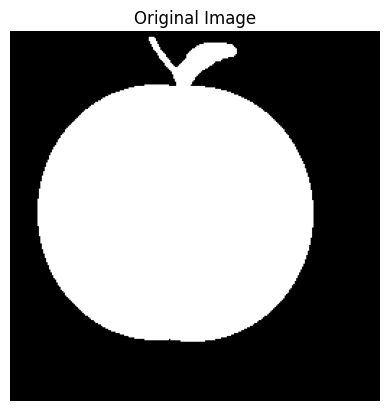

In [3]:
image_path = "./assets/apple.png"

# Load image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

#### Geometric moments :

Geometric moments are weighted sums of the pixel coordinates. They capture how the image’s mass (pixel intensities) is distributed in space.


$$
m_{p q}=\sum_x \sum_y x^p y^q I(x, y)
$$

In [4]:
def geometric_moments(img, order=3):
    """
    Calculate geometric moments up to given order
    :param img: 2D grayscale or binary image
    :param order: highest order of moments
    :return: moments as dictionary {(p,q): value}
    """
    moments = {}
    rows, cols = img.shape
    for p in range(order+1):
        for q in range(order+1):
            m_pq = np.sum((np.arange(cols)[:, None]**p) * (np.arange(rows)[None, :]**q) * img.T)
            moments[(p, q)] = m_pq
    return moments

# Calculate moments up to order 3
moments_geo = geometric_moments(image, order=3)
print(moments_geo)

{(0, 0): np.int64(7211145), (0, 1): np.int64(883577040), (0, 2): np.int64(124927846620), (0, 3): np.int64(19295371704660), (1, 0): np.int64(824321160), (1, 1): np.int64(100851967305), (1, 2): np.int64(14268064891515), (1, 3): np.int64(2205312553293345), (2, 0): np.int64(110594602110), (2, 1): np.int64(13556246192115), (2, 2): np.int64(1909328406685545), (2, 3): np.int64(292996203717629715), (3, 0): np.int64(16367900688180), (3, 1): np.int64(2013511795374465), (3, 2): np.int64(281877635896992735), (3, 3): np.int64(5936318237291865673)}


#### Calculate the Barycenter of the Image

$$
\bar{x}=\frac{m_{10}}{m_{00}}, \quad \bar{y}=\frac{m_{01}}{m_{00}}
$$

In [5]:
def barycenter(moments):
    """
    Compute the centroid of the image based on geometric moments
    """
    m00 = moments[(0,0)]
    x_bar = moments[(1,0)] / m00
    y_bar = moments[(0,1)] / m00
    return x_bar, y_bar

x_bar, y_bar = barycenter(moments_geo)
print(f"Barycenter: x={x_bar}, y={y_bar}")

Barycenter: x=114.31210438841543, y=122.52936808232258


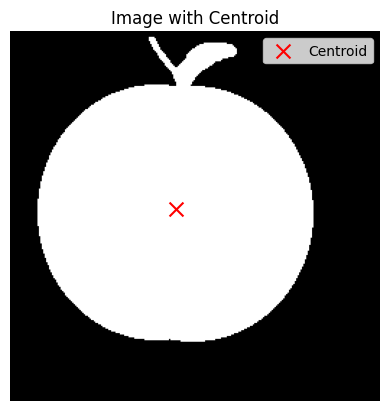

In [12]:
plt.imshow(image, cmap='gray')
plt.scatter(x_bar, y_bar, color='red', marker='x', s=100, label='Centroid')
plt.title("Image with Centroid")
plt.axis('off')
plt.legend()
plt.show()

#### Calculate Central Moments

$$
\mu_{p q}=\sum_x \sum_y(x-\bar{x})^p(y-\bar{y})^q I(x, y)
$$

In [6]:
def central_moments(img, moments):
    """
    Calculate central moments using the barycenter
    """
    x_bar, y_bar = barycenter(moments)
    rows, cols = img.shape
    mu = {}
    for p in range(4):
        for q in range(4):
            mu_pq = np.sum(((np.arange(cols)[:, None]-x_bar)**p) * ((np.arange(rows)[None, :]-y_bar)**q) * img.T)
            mu[(p,q)] = mu_pq
    return mu

mu = central_moments(image, moments_geo)
print(mu)

{(0, 0): np.float64(7211145.0), (0, 1): np.float64(1.1175870895385742e-08), (0, 2): np.float64(16663710256.750946), (0, 3): np.float64(-95546172907.13922), (1, 0): np.float64(-2.9802322387695312e-08), (1, 1): np.float64(-151583526.6871177), (1, 2): np.float64(24446715142.932766), (1, 3): np.float64(-2540939600866.248), (2, 0): np.float64(16364715618.500301), (2, 1): np.float64(39815146113.245285), (2, 2): np.float64(24319840196495.152), (2, 3): np.float64(108644142801319.34), (3, 0): np.float64(-15771173151.067352), (3, 1): np.float64(251550597270.50244), (3, 2): np.float64(-2282040379879.1094), (3, 3): np.float64(-928955122607290.8)}


#### Normalized Central Moments

$$
\eta_{p q}=\frac{\mu_{p q}}{\mu_{00}^{(1+(p+q) / 2)}}
$$

In [7]:
def normalized_central_moments(mu):
    eta = {}
    mu00 = mu[(0,0)]
    for p in range(4):
        for q in range(4):
            if p+q >= 2:
                eta[(p,q)] = mu[(p,q)] / (mu00**(1 + (p+q)/2))
    return eta

eta = normalized_central_moments(mu)
print(eta)

{(0, 2): np.float64(0.0003204521936997111), (0, 3): np.float64(-6.842309664097214e-07), (1, 1): np.float64(-2.9150335013744215e-06), (1, 2): np.float64(1.7506927822267805e-07), (1, 3): np.float64(-6.776128868263955e-09), (2, 0): np.float64(0.0003147023645046761), (2, 1): np.float64(2.8512660501103655e-07), (2, 2): np.float64(6.48556821936483e-08), (2, 3): np.float64(1.078925651310749e-10), (3, 0): np.float64(-1.1294146817432132e-07), (3, 1): np.float64(6.708302957742821e-10), (3, 2): np.float64(-2.2662536973402283e-12), (3, 3): np.float64(-3.4354040284002487e-13)}


#### Hu's invariants 

Hu moments are invariant to translation, rotation, and scale. They are widely used in object recognition.

$$
\begin{aligned}
\phi_1= & \eta_{20}+\eta_{02} \\
\phi_2= & \left(\eta_{20}-\eta_{02}\right)^2+4 \eta_{11}^2 \\
\phi_3= & \left(\eta_{30}-3 \eta_{12}\right)^2+\left(3 \eta_{21}-\mu_{03}\right)^2 \\
\phi_4= & \left(\eta_{30}+\eta_{12}\right)^2+\left(\eta_{21}+\mu_{03}\right)^2 \\
\phi_5= & \left(\eta_{30}-3 \eta_{12}\right)\left(\eta_{30}+\eta_{12}\right)\left[\left(\eta_{30}+\eta_{12}\right)^2-3\left(\eta_{21}+\eta_{03}\right)^2\right] \\
& +\left(3 \eta_{21}-\eta_{03}\right)\left(\eta_{21}+\eta_{03}\left[3\left(\eta_{30}+\eta_{12}\right)^2-\left(\eta_{21}+\eta_{03}\right)^2\right]\right. \\
\phi_6= & \left(\eta_{20}-\eta_{02}\right)\left[\left(\eta_{30}+\eta_{12}\right)^2-\left(\eta_{21}+\eta_{03}\right)^2\right] \\
& +4 \eta_{11}\left(\eta_{30}+\eta_{12}\right)\left(\eta_{21}+\eta_{03}\right) \\
\phi_7= & \left(3 \eta_{21}-\eta_{03}\right)\left(\eta_{30}+\eta_{12}\right)\left[\left(\eta_{30}+\eta_{12}\right)^2-3\left(\eta_{21}+\eta_{03}\right)^2\right] \\
& -\left(\eta_{30}-3 \eta_{12}\right)\left(\eta_{21}+\eta_{03}\right)\left[\left(3\left(\eta_{30}+\eta_{12}\right)^2-\left(\eta_{21}+\eta_{03}\right)^2\right]\right.
\end{aligned}
$$

In [9]:
def hu_moments(eta):
    """
    Calculate Hu's seven moment invariants
    """
    # Alias for readability
    n20 = eta.get((2,0),0)
    n02 = eta.get((0,2),0)
    n11 = eta.get((1,1),0)
    n30 = eta.get((3,0),0)
    n03 = eta.get((0,3),0)
    n21 = eta.get((2,1),0)
    n12 = eta.get((1,2),0)

    # Hu's invariants
    hu = [0]*7
    hu[0] = n20 + n02
    hu[1] = (n20 - n02)**2 + 4*n11**2
    hu[2] = (n30 - 3*n12)**2 + (3*n21 - n03)**2
    hu[3] = (n30 + n12)**2 + (n21 + n03)**2
    hu[4] = (n30 - 3*n12)*(n30 + n12)*((n30 + n12)**2 - 3*(n21 + n03)**2) + \
            (3*n21 - n03)*(n21 + n03)*(3*(n30 + n12)**2 - (n21 + n03)**2)
    hu[5] = (n20 - n02)*((n30 + n12)**2 - (n21 + n03)**2) + 4*n11*(n30+n12)*(n21+n03)
    hu[6] = (3*n21 - n03)*(n30+n12)*((n30+n12)**2 - 3*(n21+n03)**2) - \
            (n30 - 3*n12)*(n21+n03)*(3*(n30+n12)**2 - (n21+n03)**2)
    return hu

hu = hu_moments(eta)
print("Hu's moment invariants:", hu)


Hu's moment invariants: [np.float64(0.0006351545582043872), np.float64(6.705021702861769e-11), np.float64(2.777635891053189e-12), np.float64(1.6314415606885674e-13), np.float64(1.0955173728139615e-25), np.float64(1.1827825241455401e-18), np.float64(-7.720046625317244e-27)]


In [10]:
# Example: Rotate image and recompute Hu moments
rows, cols = image.shape
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1) # 45 degrees
rotated = cv2.warpAffine(image, M, (cols, rows))

moments_geo_rot = geometric_moments(rotated, order=3)
mu_rot = central_moments(rotated, moments_geo_rot)
eta_rot = normalized_central_moments(mu_rot)
hu_rot = hu_moments(eta_rot)

print("Hu moments original:", hu)
print("Hu moments rotated:", hu_rot)

Hu moments original: [np.float64(0.0006351545582043872), np.float64(6.705021702861769e-11), np.float64(2.777635891053189e-12), np.float64(1.6314415606885674e-13), np.float64(1.0955173728139615e-25), np.float64(1.1827825241455401e-18), np.float64(-7.720046625317244e-27)]
Hu moments rotated: [np.float64(0.0006351915966497277), np.float64(6.626129291139528e-11), np.float64(2.7727429051238203e-12), np.float64(1.6283155153339794e-13), np.float64(1.0915199428908925e-25), np.float64(1.171623127486146e-18), np.float64(-7.52996194386489e-27)]


In [27]:
# Paths to your test images
image_paths = {
    "Original": "./assets/apple.png",
    "Rotated": "./assets/apple_30.png",
    "Translated": "./assets/apple_t_1515.png",
    "Scaled": "./assets/apple_scale05.png"
}

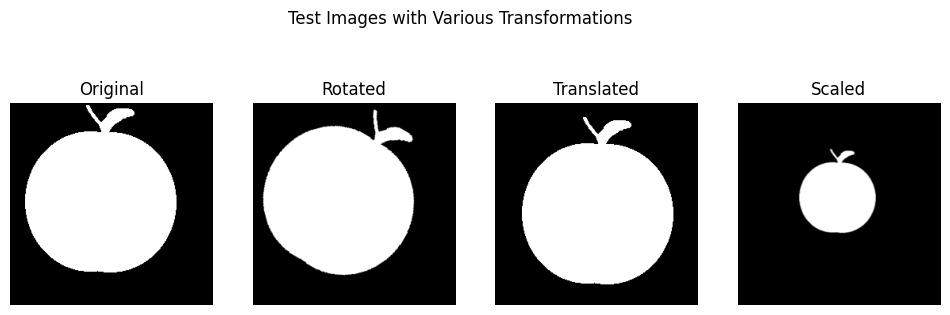

In [28]:
plt.figure(figsize=(12, 4))
images = {}
for i, (label, path) in enumerate(image_paths.items()):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.subplot(1, len(image_paths), i+1)
    images[label] = img
    plt.imshow(img, cmap='gray')
    plt.title(label)
    plt.axis('off')

plt.suptitle("Test Images with Various Transformations")
plt.show()

In [25]:
def compute_centroid_and_hu(img):
    """
    Compute geometric moments, centroid, and Hu's invariants for an image
    """
    # Geometric moments
    geo = geometric_moments(img, order=3)
    x_bar, y_bar = barycenter(geo)

    # Central and normalized moments
    mu = central_moments(img, geo)
    eta = normalized_central_moments(mu)
    hu = hu_moments(eta)

    return (x_bar, y_bar), np.array(hu)

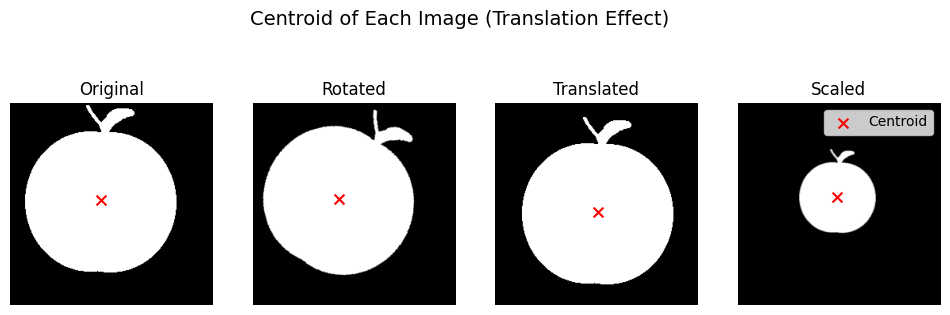

Original → Centroid: (x=114.31, y=122.53)
Rotated → Centroid: (x=109.26, y=121.34)
Translated → Centroid: (x=129.31, y=137.53)
Scaled → Centroid: (x=125.15, y=118.51)


In [29]:
plt.figure(figsize=(12, 4))

centroids = {}
for i, (label, img) in enumerate(images.items()):
    (cx, cy), hu = compute_centroid_and_hu(img)
    centroids[label] = (cx, cy)
    
    # Display image with centroid marker
    plt.subplot(1, len(images), i+1)
    plt.imshow(img, cmap='gray')
    plt.scatter(cx, cy, c='red', s=50, marker='x', label='Centroid')
    plt.title(label)
    plt.axis('off')

plt.suptitle("Centroid of Each Image (Translation Effect)", fontsize=14)
plt.legend()
plt.show()

# Print centroid coordinates
for label, (cx, cy) in centroids.items():
    print(f"{label} → Centroid: (x={cx:.2f}, y={cy:.2f})")

#### Compute Hu Moments for All Images

In [36]:
hu_results = {}
for label, img in images.items():
    (_, _), hu = compute_centroid_and_hu(img)
    hu_results[label] = hu

# Create DataFrame for easy comparison
df_hu = pd.DataFrame(hu_results, index=[f'Hu{i+1}' for i in range(7)])


#### Apply Log Transform for Better Visualization

Hu moments vary over large ranges (e.g., 10⁻² to 10⁻¹⁰).
Taking 
$$ 
-sign*log10(|Hu|) 
$$ 
compresses this range for easier visualization.

In [37]:
df_hu_log = df_hu.applymap(lambda x: -np.sign(x) * np.log10(abs(x)) if x != 0 else 0)
display(df_hu_log.style.format("{:.3f}").set_caption("Log-Scaled Hu Moments (−sign·log10|Hu|)"))


C:\Users\ahmed\AppData\Local\Temp\ipykernel_12172\3708256829.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_hu_log = df_hu.applymap(lambda x: -np.sign(x) * np.log10(abs(x)) if x != 0 else 0)


,Original,Rotated,Translated,Scaled
Hu1,3.197,3.197,3.197,3.197
Hu2,10.174,10.176,10.174,10.484
Hu3,11.556,11.556,11.556,11.560
Hu4,12.787,12.787,12.787,12.809
Hu5,24.960,24.960,24.960,24.994
Hu6,17.927,17.928,17.927,18.521
Hu7,-26.112,-26.111,-26.112,-26.177


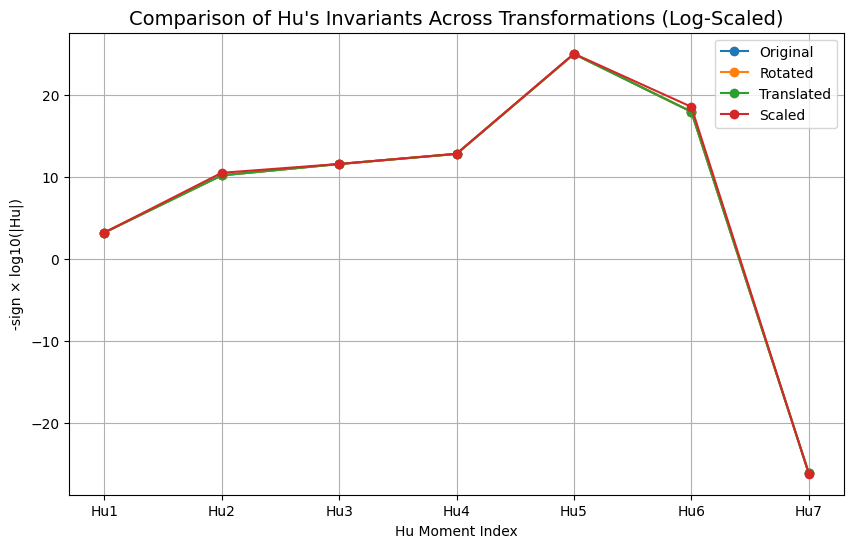

In [35]:
plt.figure(figsize=(10,6))
for label in df_hu_log.columns:
    plt.plot(df_hu_log.index, df_hu_log[label], marker='o', label=label)

plt.title("Comparison of Hu's Invariants Across Transformations (Log-Scaled)", fontsize=14)
plt.ylabel("-sign × log10(|Hu|)")
plt.xlabel("Hu Moment Index")
plt.grid(True)
plt.legend()
plt.show()

## Summary 

In summary, we started by calculating the geometric moments, which are weighted sums of the pixel intensities in an image. These moments describe how the intensity values are distributed spatially across the image.
Next, we used these moments to compute the centroid (barycenter) of the image, which represents its center of mass.
Then, we calculated the central moments and normalized central moments, which make the representation invariant to translation and scaling, respectively.
Finally, using moments up to the third order, we derived the seven Hu invariant moments, which are invariant to translation, rotation, and scaling, and serve as robust shape descriptors.
